<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Problemes 5 - Minimum Spanning Tree</h2>
</center>
</div>

In [217]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [218]:
import networkx as nx
from matplotlib import pyplot as plt
import math

<div class="alert alert-success">
    <h1>Problema 1: Union Find</h1>
    <p>
       Implementarem l'algorisme Union-Find. <br>
        Implementeu les tres funcions següents seguint les indicacions de la capçalera.
    </p>    
    
</div>

In [219]:
from collections import defaultdict


def union(parent, rank, node1, node2):
    """
    Operació d'unió de dos nodes. Al finalitzar aquesta funció, s'haurà assignat un dels
    dos nodes d'entrada com a node pare de l'altre. Decidim quin en funció del seu rang.
    
    Params
    ======
    :parent: Diccionari on emmagatzem quin node és pare de quin altre. Aquest diccionari
             ens permet saber l'estructura del graf que estem construint.

    :rank: Diccionari per saber el rang de cada node.
    :node1, node2: Els dos nodes que volem connectar
    """
    if rank[node1] <= rank[node2]:
        parent[node1] = node2
        if rank[node1] == rank[node2]:
            rank[node2] += 1
    else:
        parent[node2] = node1


def find(parent, node):
    """
    Donat un node i el diccionari d'estructura del graf amb tots els nodes pare, retorna 
    l'arrel del grup on 'node' pertany.
    
    Params
    ======
    :parent: Diccionari on cada node té associat un node pare.
    :node: Node del que volem comprovar quin és el node arrel del grup al que pertany.
    
    Returns
    =======
    :root: Node arrel del grup on 'node' pertany.
    
    """

    while node != parent[node]:
        node = parent[node]
    return node


def union_find(lst):
    """
    Implementació de l'algorisme union-find.
    
    Params
    ======
    :lst: Llista de parelles amb les connexions que volem realitzar.    
    
    Returns
    =======
    :parent: Diccionari parent final. Cada node té associat el seu node pare.
    :parent_states: Versions de la variable parent.
    """

    # Agafem tots els nodes únics
    list1, list2 = zip(*lst)
    unique_nodes = set(list1 + list2)

    # Inicialitzem les dues variables rank i parent que ens serviran per anar construïnt el graf
    rank = defaultdict(int)
    parent = {n: n for n in unique_nodes}

    # Aquesta variable no forma part de l'algorisme. Guardarem totes les modificacions del diccionari 'parent' que anem fent i, d'aquesta
    # forma, podrem veure com anem connectant tots els nodes.
    parent_states = []
    for node1, node2 in list(zip(list1, list2)):
        find_node1 = find(parent, node1)
        find_node2 = find(parent, node2)
        if find_node1 != find_node2:
            union(parent, rank, find_node1, find_node2)
            parent_states.append(parent.copy())

    return parent, parent_states

Observeu que usant aquest algorisme, els grafs que creem són sempre arbres, és a dir, que no tenen cicles.

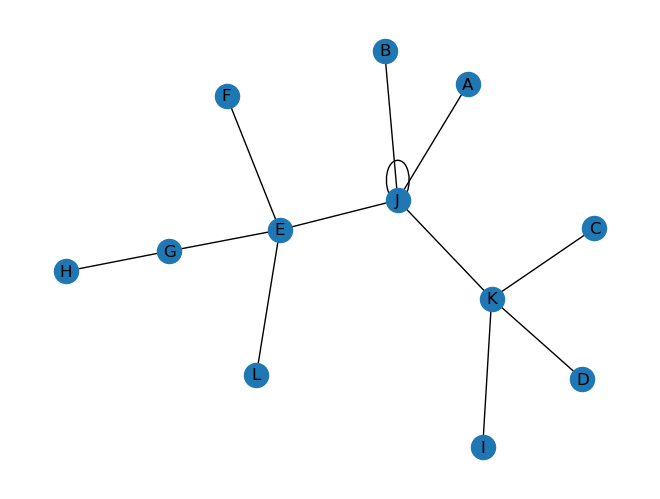

In [153]:
lst = [("C", "K"), ("F", "E"), ("A", "J"), ("A", "B"), ("C", "D"), ("D", "I"), ("L", "F"), ("C", "A"), ("A", "B"),
       ("H", "G"), ("H", "F"), ("H", "B")]
struc, struc_states = union_find(lst)

G = nx.Graph(struc)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels=True)

Podem veure la construcció d'aquest arbre utilitzant la variable on hem anat guardant totes les versions descomentant el següent bloc de codi.

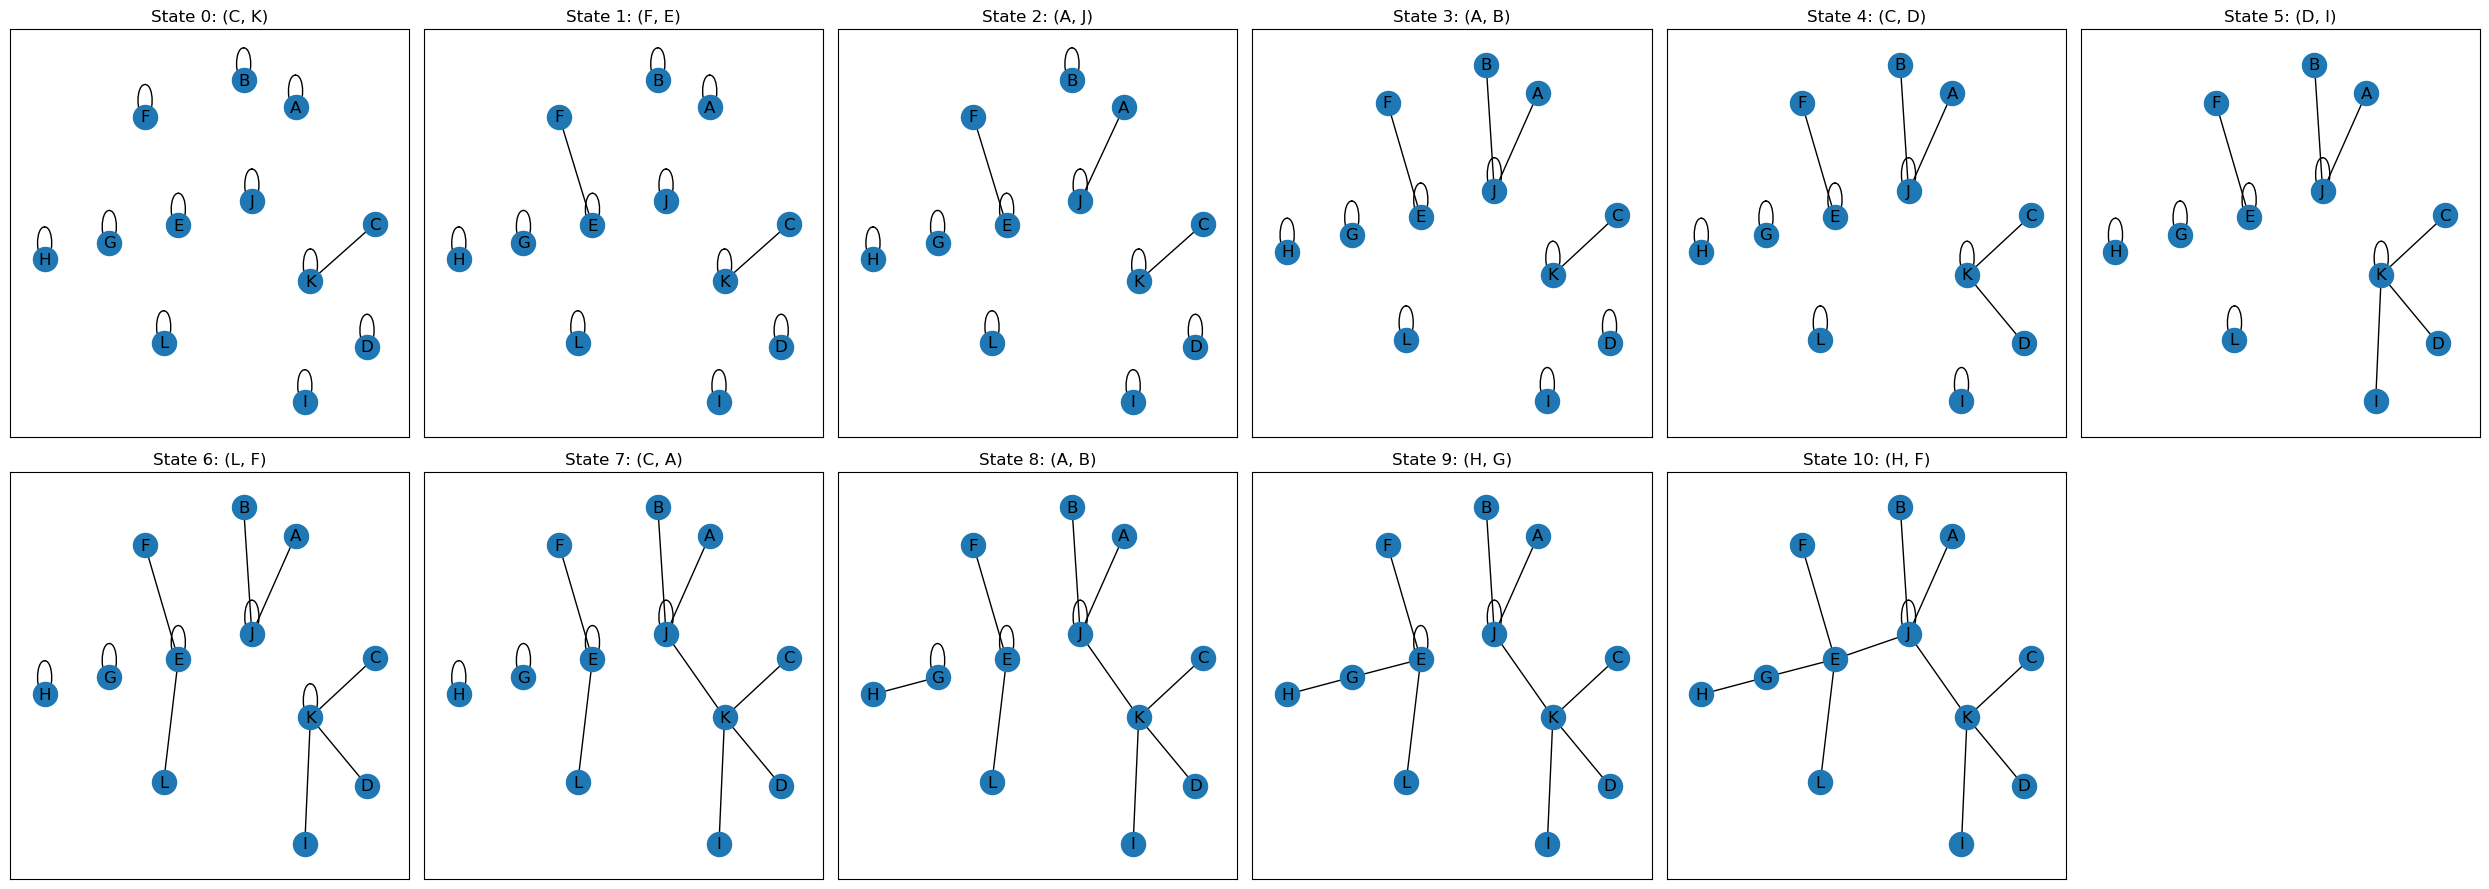

In [154]:
fig, axs = plt.subplots(math.ceil(len(struc_states) / 6), 6, figsize=(25, math.ceil(len(struc_states) / 6) * 4.5))
axs = axs.flatten()
for i, state in enumerate(struc_states):
    G_state = nx.Graph(state)
    # Agafem la posició del graph final per a que tots els plots siguin iguals
    nx.draw_networkx(G_state, pos=pos, ax=axs[i], with_labels=True)
    n1, n2 = lst[i]
    axs[i].set_title(f'State {i}: ({n1}, {n2})')
for i in range(len(struc_states), len(axs)):
    axs[i].axis('off')
plt.tight_layout()
plt.show()

<div class="alert alert-success">
    <h1>Problema 2: Detecció de cicles</h1>
    <p>
        Utilitzeu les fucnions <b>union</b> i <b>find</b> implementades en l'exercici anterior per a comprovar si un graf conté cicles. 
    </p>    
    
</div>

In [215]:
def detect_cycles(lst):
    """
    Detecta si un graf conté cicles
    
    Params
    ======
    :lst: Llista d'arestes del graf
    """

    # Agafem tots els nodes únics
    list1, list2 = zip(*lst)
    unique_nodes = set(list1 + list2)

    # Inicialitzem les dues variables rank i parent que ens serviran per anar construïnt el graf
    rank = defaultdict(int)
    parent = {n: n for n in unique_nodes}

    for node1, node2 in lst:
        parent1 = find(parent, node1)
        parent2 = find(parent, node2)
        if parent1 == parent2:
            return True
        else:   
            union(parent, rank, parent1, parent2)
    return False

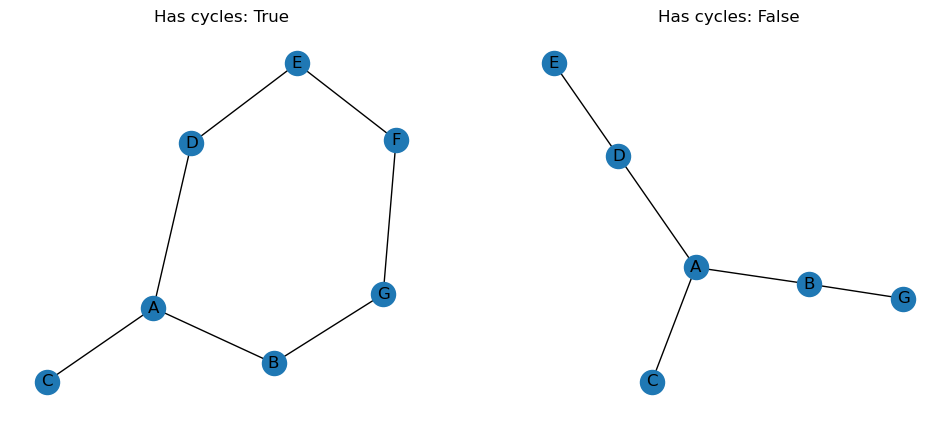

In [216]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

lst = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'B')]
G = nx.Graph(lst)
has_cycles = detect_cycles(lst)
nx.draw(G, with_labels=True, ax=axs[0])
axs[0].set_title(f"Has cycles: {has_cycles}")

lst = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('D', 'E'), ('G', 'B')]
G = nx.Graph(lst)
has_cycles = detect_cycles(lst)
nx.draw(G, with_labels=True, ax=axs[1])
axs[1].set_title(f"Has cycles: {has_cycles}")

plt.show()

<div class="alert alert-success">
    <h1>Problema 3: Kruskal</h1>
    <p>
       Implementeu l'algorisme Kruskal, basat en l'agorisme Union-Find. Podeu usar les funcions <b>union</b> i <b>find</b> ja implementades.
    </p>    
    
</div>

In [214]:
def kruskal(lst):
    """
    Implementació de l'algorisme kruskal
    
    Params
    ======
    :lst: Una llista d'arestes amb pes del graf del que volem trobar-ne el MST. lst=[(n1,n2,w1),...]
    
    Returns
    =======
    :tree: Llista d'arestes del MST
    :tree_states: Versions de la variable tree que ens serviran per veure la construcció del MST.
    """
    
  # Agafem tots els nodes únics
    list1, list2,list3 = zip(*lst)
    unique_nodes = set(list1 + list2)

    # Inicialitzem les dues variables rank i parent que ens serviran per anar construïnt el graf
    rank = defaultdict(int)
    parent = {n: n for n in unique_nodes}
    sorted_lst = sorted(lst, key=lambda x: x[2])
    tree_states = []
    state = []
    for node1, node2, w in sorted_lst:
        p1 = find(parent, node1)
        p2 = find(parent, node2)
        if p1 != p2 :
            union(parent, rank, p1, p2)
            state.append((p1, p2, w))
        tree_states.append(state.copy())
    
    tree = tree_states[-1]
        
    return tree, tree_states

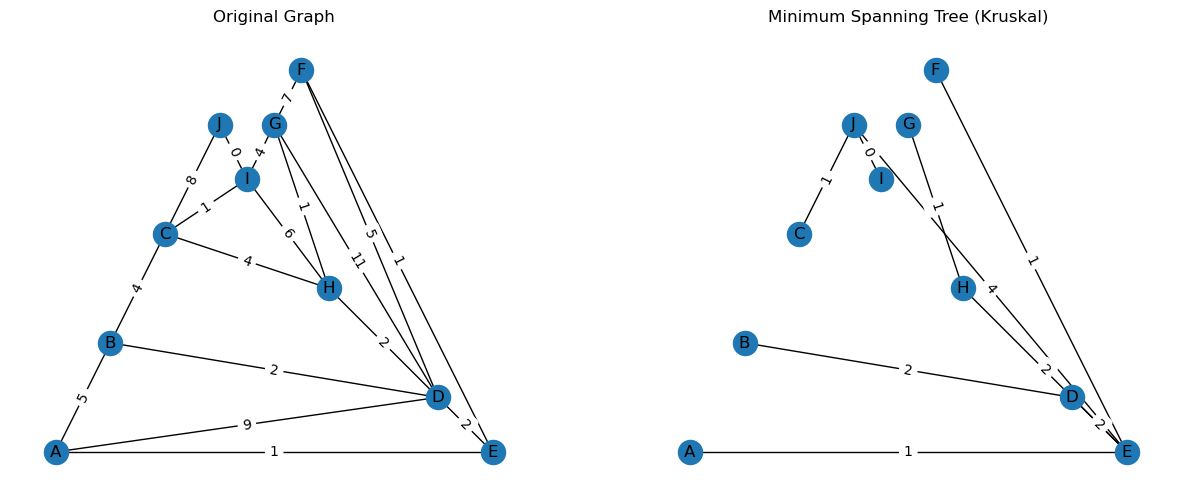

In [213]:
lst = [('A', 'B', 5), ('A', 'D', 9), ('A', 'E', 1), ('B', 'C', 4), ('B', 'D', 2), ('C', 'J', 8), ('C', 'I', 1),
       ('C', 'H', 4), ('D', 'E', 2), ('D', 'F', 5), ('D', 'G', 11), ('D', 'H', 2), ('E', 'F', 1), ('F', 'G', 7),
       ('G', 'H', 1), ('G', 'I', 4),
       ('H', 'I', 6), ('I', 'J', 0)]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Creem un graf i el mostrem a partir de la llista d'arestes i pesos anterior
G = nx.Graph()
G.add_weighted_edges_from(lst)
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, ax=axs[0])
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=axs[0])
axs[0].set_title('Original Graph')

# Executem l'algorisme sobre aquesta llista
struc, struc_states = kruskal(lst)

# Mostrem el MST
G = nx.Graph()
G.add_weighted_edges_from(struc)
nx.draw(G, pos=pos, with_labels=True, ax=axs[1])
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=axs[1])
axs[1].set_title('Minimum Spanning Tree (Kruskal)')

plt.show()

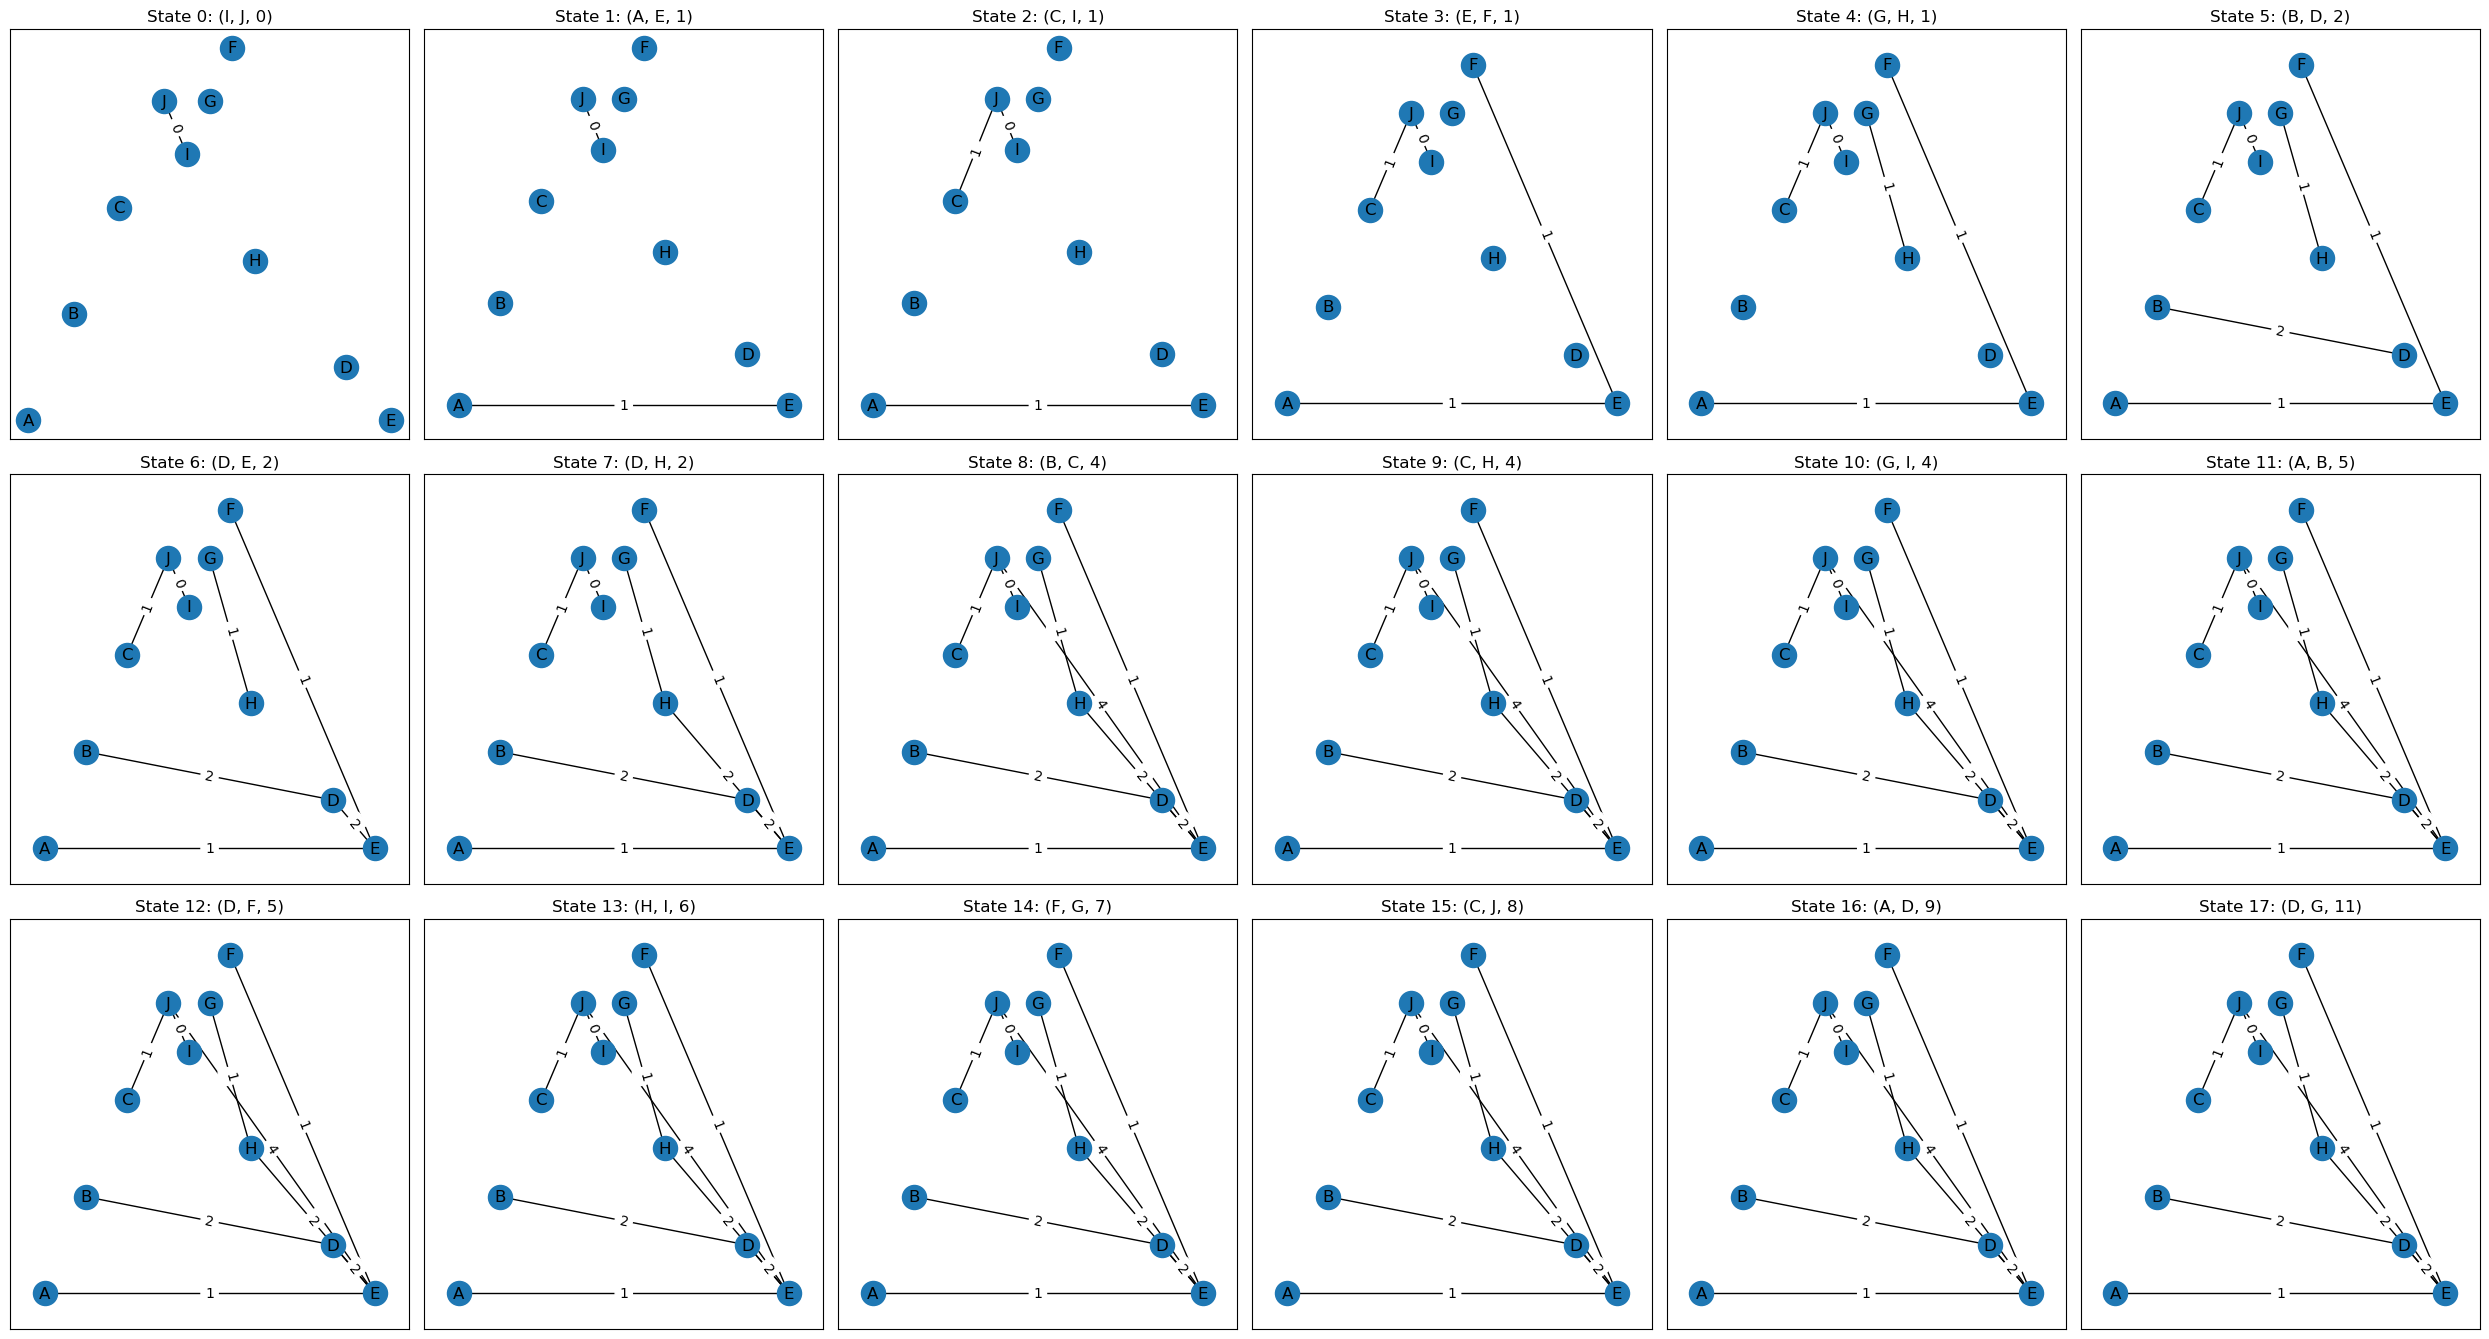

In [212]:
fig, axs = plt.subplots(math.ceil(len(struc_states)/6), 6, figsize=(25,math.ceil(len(struc_states)/6)*4.5))
axs = axs.flatten()

lst = sorted(lst, key=lambda x: x[2])
for i, state in enumerate(struc_states):
    G_state = nx.Graph()
    G_state.add_nodes_from(G.nodes())
    G_state.add_weighted_edges_from(state)

    # Agafem la posició del grap final per a que tots els plots siguin iguals
    nx.draw_networkx(G_state, pos=pos, ax=axs[i], with_labels=True)
    labels = nx.get_edge_attributes(G_state,'weight')
    nx.draw_networkx_edge_labels(G_state,pos,edge_labels=labels, ax=axs[i])

    n1, n2, w = lst[i]
    axs[i].set_title(f'State {i}: ({n1}, {n2}, {w})')

for i in range(len(struc_states), len(axs)): 
    axs[i].axis('off')
plt.tight_layout()
plt.show()